# Projet 05 : Analyse approfondie

---

## <font color=blue>Sommaire</font>

[1. Analyse approfondie : Estimation des valeurs manquantes](#1_0)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1. Estimation des variables avec une seule valeur manquante](#1_1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2. Estimation des variables avec plusieurs valeurs manquantes](#1_2)  
  
[2. Analyse approfondie : 11 variables - 8 clusters](#2_0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Classification hiérarchique](#2_1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Analyse des résultats](#2_2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Visualisation des résultats par une ACP](#2_3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Sauvegarde des données](#2_4)  
  
[3. Curiosité : Classification par k-means](#3_0)  
  


**Importation des librairies et des données**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sf_classification_acp as sfca
import sf_stats_inferentielles as sfsi

---

<a id="1_0"></a>

## <font color=blue>1. Analyse approfondie : Estimation des valeurs manquantes</font>

In [2]:
data_primaire_2013 = pd.read_csv("projet05_data_primaire_2013.csv")
data_secondaire_2013 = pd.read_csv("projet05_data_secondaire_2013.csv")
data_primaire_2013.head()

,country_code,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_balance_commerciale_tonnes,poultry_food_supply_tonnes,poultry_food_proportion_import,taux_urbanisation,political_stability,gdp_per_capita_usd,income_variability,doing_business_score
0,1,Arménie,-0.041188,0.480342,90.04,2928.0,0.104277,-32000.0,40000.0,0.800000,0.647824,0.11,3843.590751,2.698087,76.30
1,2,Afghanistan,0.375760,0.209785,58.25,2089.0,0.071195,-48000.0,75000.0,0.640000,0.249087,-2.52,681.034215,1.531833,48.94
2,3,Albanie,-0.061725,0.533297,111.42,3193.0,0.083137,-25000.0,42000.0,0.595238,0.602075,0.09,4376.970549,0.689007,75.37
3,4,Algérie,0.183161,0.271749,91.96,3296.0,0.091236,-3000.0,291000.0,0.010309,0.710867,-1.20,5471.123389,0.424757,56.92
4,7,Angola,0.428216,0.321341,57.26,2473.0,0.317391,-342000.0,372000.0,0.919355,0.350915,-0.39,5258.408495,1.334412,44.43


Pour mon analyse plus poussée, je choisis de sélectionner onze variables :
- croissance_population : la croissance de la population ;
- food_proportion_animal_protein : la proportion des protéines d'origine animale ;
- food_protein_g_capita_day : la disponibilité alimentaire en quantité de protéines ;
- food_supply_kcal_capita_day : la disponibilité alimentaire en calories ;
- animals_proportion_poultry_protein : la proportion de protéines animales qui provient de la viande de volaille ;
- poultry_food_proportion_import : la proportion des importations dans la consommation humaine de viande de volaille ; 
- gdp_per_capita_usd : le PIB par habitant ;
- income_variability : la variabilité des revenus par habitant ;
- taux_urbanisation : le taux d'urbanisation du pays ;
- political_stability : la stabilité politique du pays ;
- doing_business_score : le score Doing Business qui traduit la facilité, le coût et le risque d'établir des exportations vers un pays donné.

In [3]:
data = data_primaire_2013.loc[:,"croissance_population":"food_supply_kcal_capita_day"].copy()
data["animals_proportion_poultry_protein"] = data_primaire_2013.animals_proportion_poultry_protein
data["poultry_food_proportion_import"] = data_primaire_2013.poultry_food_proportion_import
data["gdp_per_capita_usd"] = data_primaire_2013.gdp_per_capita_usd
data["income_variability"] = data_primaire_2013.income_variability
data["taux_urbanisation"] = data_primaire_2013.taux_urbanisation
data["political_stability"] = data_primaire_2013.political_stability
data["doing_business_score"] = data_primaire_2013.doing_business_score
data.index = data_primaire_2013.country
data.head()

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import,gdp_per_capita_usd,income_variability,taux_urbanisation,political_stability,doing_business_score
country,,,,,,,,,,,
Arménie,-0.041188,0.480342,90.04,2928.0,0.104277,0.800000,3843.590751,2.698087,0.647824,0.11,76.30
Afghanistan,0.375760,0.209785,58.25,2089.0,0.071195,0.640000,681.034215,1.531833,0.249087,-2.52,48.94
Albanie,-0.061725,0.533297,111.42,3193.0,0.083137,0.595238,4376.970549,0.689007,0.602075,0.09,75.37
Algérie,0.183161,0.271749,91.96,3296.0,0.091236,0.010309,5471.123389,0.424757,0.710867,-1.20,56.92
Angola,0.428216,0.321341,57.26,2473.0,0.317391,0.919355,5258.408495,1.334412,0.350915,-0.39,44.43


In [4]:
data.isna().sum()

croissance_population                 0
food_proportion_animal_protein        0
food_protein_g_capita_day             0
food_supply_kcal_capita_day           0
animals_proportion_poultry_protein    0
poultry_food_proportion_import        0
gdp_per_capita_usd                    1
income_variability                    1
taux_urbanisation                     0
political_stability                   3
doing_business_score                  7
dtype: int64

Il y a quelques données manquantes pour quatre variables. Pour commencer, je vérifie les pays pour lesquels j'ai des données manquantes.  
Je me base sur des classifications hiérarchiques pour estimer les données manquantes avec les données des pays les plus similaires sur les autres variables. Je procède en deux étapes.  
D'abord, j'estime le PIB par habitant et la dispersion des revenus à partir d'une première classification, basée sur les 7 variables sans donnée manquante.  
Puis, une deuxième classification hiérarchique basée sur 9 variables, incluant les deux variables avec les données que je viens d'estimer, me permet d'évaluer les indices de stabilité politique et les scores doing business manquants.

<a id="1_1"></a>

### <font color=blue>1.1. Estimation des variables avec une seule valeur manquante</font>

In [5]:
data[data.gdp_per_capita_usd.isna() | data.income_variability.isna() | data.political_stability.isna() | \
     data.doing_business_score.isna()][["gdp_per_capita_usd","income_variability","political_stability","doing_business_score"]]

,gdp_per_capita_usd,income_variability,political_stability,doing_business_score
country,,,,
Bermudes,89968.618136,2.433545,0.97,NaN
Cuba,6760.153440,3.169014,0.37,NaN
Polynésie française,22045.687291,0.204988,NaN,NaN
République populaire démocratique de Corée,666.272365,0.143266,-0.44,NaN
Chine - RAS de Macao,89525.344880,1.406518,0.76,NaN
Namibie,5490.057930,3.132197,NaN,67.62
Nouvelle-Calédonie,38344.045038,0.525762,NaN,NaN
Turkménistan,7304.420525,0.281690,0.25,NaN
"Chine, Taiwan Province de",NaN,0.533689,0.87,83.56


In [6]:
liste_pays_gdp = data[data.gdp_per_capita_usd.isna()].index
liste_pays_income_variability = data[data.income_variability.isna()].index
liste_pays_political_stability = data[data.political_stability.isna()].index
liste_pays_doingbusiness = data[data.doing_business_score.isna()].index

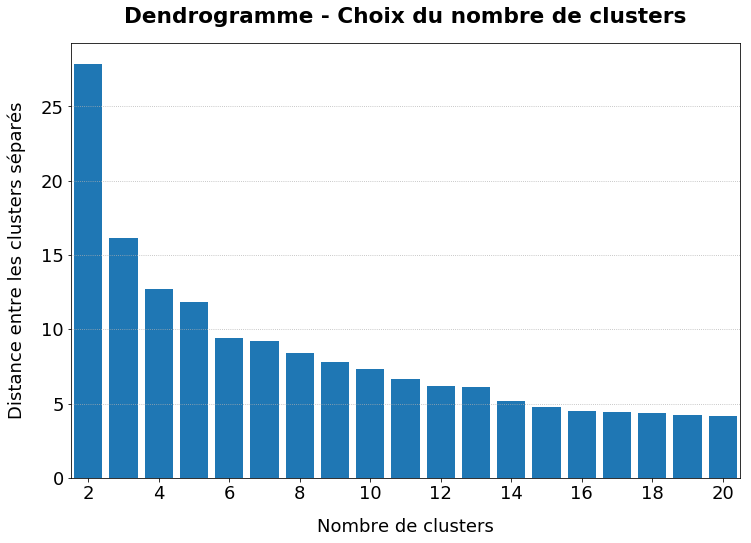

In [7]:
estimation_data = data[["croissance_population","food_proportion_animal_protein","food_protein_g_capita_day","food_supply_kcal_capita_day",\
                        "animals_proportion_poultry_protein","poultry_food_proportion_import","taux_urbanisation"]]
dendro1 = sfca.ClassificationHierarchique(estimation_data)
fig, ax = dendro1.graphique_choix_nclusters(20)

Soit je choisis 5 clusters, car il y a ensuite un décrochage dans la distance entre les clusters séparés. Soit je partitionne beaucoup plus précisément en gardant 14 clusters (en me basant sur une distance entre les clusters séparés supérieure à 5).

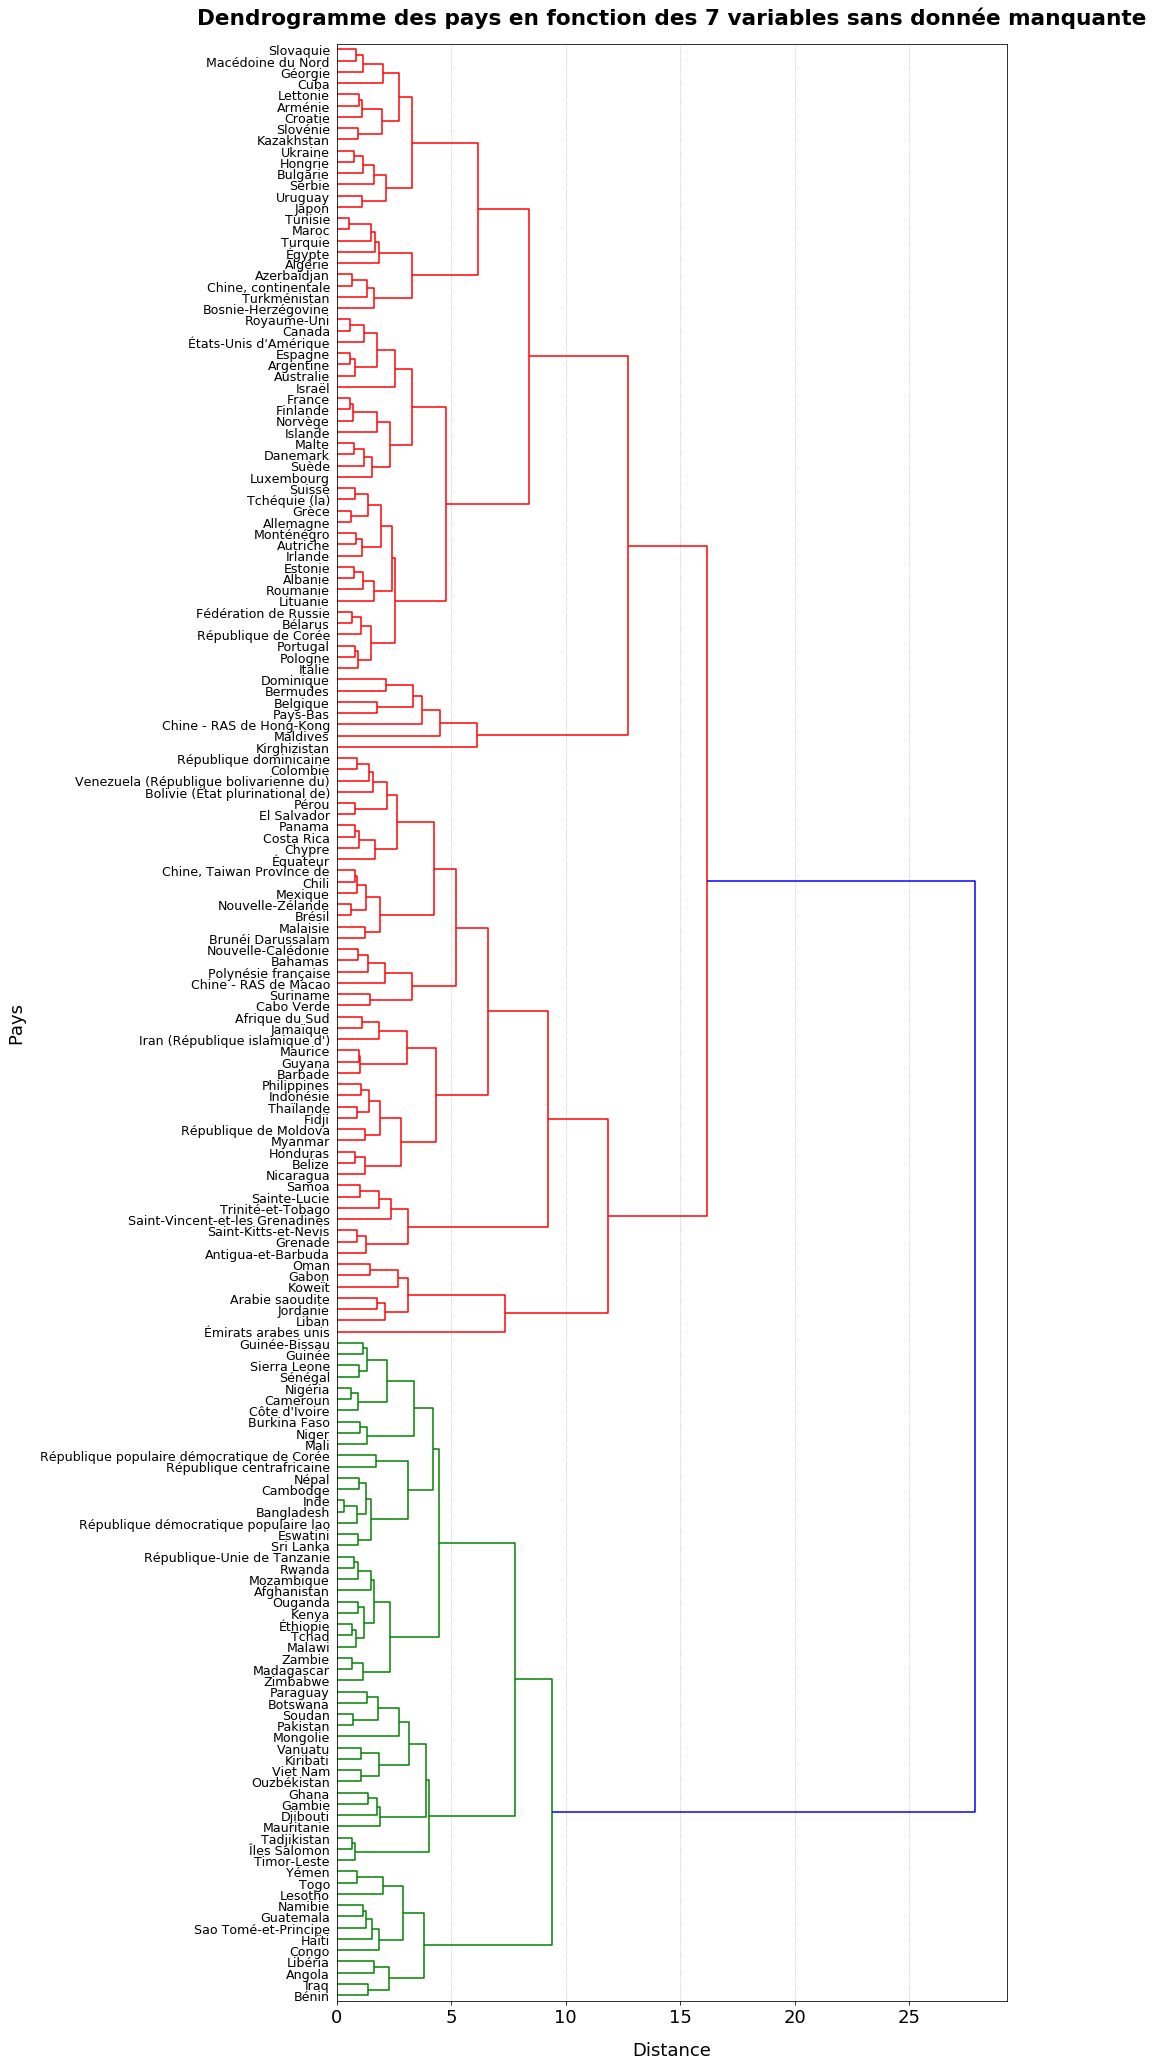

In [8]:
fig, ax = dendro1.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 7 variables sans donnée manquante", clusters_label_title="Pays", orientation='right', figsize=(12,36), mult_clusters_label_size=0.7)

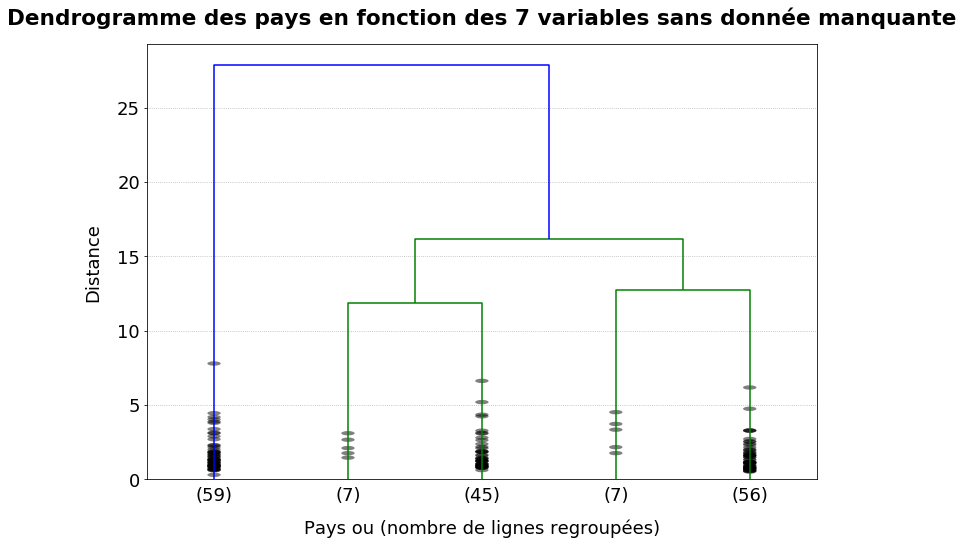

In [9]:
# je commence avec 5 clusters
n_clusters = 5
dendro1.define_n_clusters(n_clusters)
fig, ax = dendro1.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 7 variables sans donnée manquante", clusters_label_title="Pays", n_clusters=n_clusters)

In [10]:
dendro1.df_centroids

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import,taux_urbanisation,nombre_individus
cluster 1,0.261427,0.262613,62.143220,2423.847458,0.114551,0.356180,0.384898,59
cluster 2,0.614568,0.436159,91.240000,3167.714286,0.329811,0.741875,0.809415,7
cluster 3,0.119376,0.496655,78.247778,2781.844444,0.292981,0.368807,0.584749,45
cluster 4,0.087600,0.611993,102.164286,3057.285714,0.138436,2.269339,0.759990,7
cluster 5,0.045264,0.521023,100.290714,3284.660714,0.153997,0.339372,0.705448,56


In [11]:
analysis = dendro1.df_data_clusters
analysis.loc[liste_pays_gdp].cluster.unique()

array([3], dtype=int64)

In [12]:
analysis.loc[liste_pays_income_variability].cluster.unique()

array([1], dtype=int64)

Les pays avec des données manquantes se trouvent dans les clusters 1 et 3 qui contiennent chacun plus de 45 pays. Une classification plus précise permettra d'avoir une meilleure estimation des valeurs manquantes. Je fais une classification avec 14 clusters.

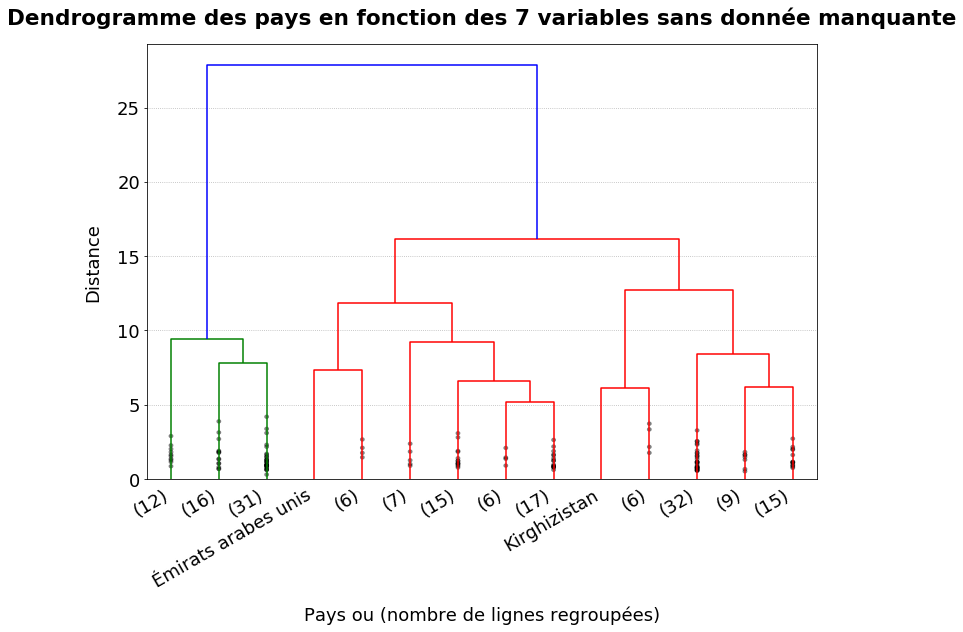

In [13]:
dendro2 = sfca.ClassificationHierarchique(estimation_data)
n_clusters = 14
dendro2.define_n_clusters(n_clusters)
fig, ax = dendro2.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 7 variables sans donnée manquante", clusters_label_title="Pays", n_clusters=n_clusters, label_rotation=30)

Le nombre maximum de pays par cluster dépasse désormais à peine 30. Je vais me baser sur cette classification pour évaluer les données manquantes du PIB par habitant et de la dispersion des revenus.

In [14]:
analysis = dendro2.df_data_clusters
print("cluster : {}".format(analysis.loc[liste_pays_gdp].cluster.unique()))
print("nombre d'individus : {}".format(\
       dendro2.df_centroids.loc["cluster {}".format(analysis.loc[liste_pays_gdp].cluster[0])].nombre_individus))

cluster : [9]
nombre d'individus : 17.0


In [15]:
print("cluster : {}".format(analysis.loc[liste_pays_income_variability].cluster.unique()))
print("nombre d'individus : {}".format(\
       dendro2.df_centroids.loc["cluster {}".format(analysis.loc[liste_pays_income_variability].cluster[0])].nombre_individus))

cluster : [2]
nombre d'individus : 16.0


Mon estimation est donc basée sur un groupe de 17 pays pour le PIB par habitant manquant et sur un groupe de 16 pays pour la variabilité des revenus manquante.

Je tire de cette classification l'estimation du PIB par habitant et de la dispersion des revenus. Je complète ces données manquantes dans le dataframe data_primaire_2013.

In [16]:
for pays in liste_pays_gdp:
    index_pays = data_primaire_2013[data_primaire_2013.country == pays].index
    cluster_estimation = analysis.loc[pays,"cluster"]
    liste_pays_estimation = analysis[analysis.cluster == cluster_estimation].index
    estimation = data_primaire_2013[data_primaire_2013.country.isin(liste_pays_estimation)].gdp_per_capita_usd.mean()
    data_primaire_2013.loc[index_pays,"gdp_per_capita_usd"] = estimation

In [17]:
for pays in liste_pays_income_variability:
    index_pays = data_primaire_2013[data_primaire_2013.country == pays].index
    cluster_estimation = analysis.loc[pays,"cluster"]
    liste_pays_estimation = analysis[analysis.cluster == cluster_estimation].index
    estimation = data_primaire_2013[data_primaire_2013.country.isin(liste_pays_estimation)].income_variability.mean()
    data_primaire_2013.loc[index_pays,"income_variability"] = estimation

Je crée à nouveau mon dataframe data. Je vérifie que je n'ai plus de données manquantes pour le PIB par habitant et pour la dispersion des revenus. Puis je relance une classification hiérarchique pour estimer les données manquantes pour l'indice de stabilité politique et le score doing business.

<a id="1_2"></a>

### <font color=blue>1.2. Estimation des variables avec plusieurs valeurs manquantes</font>

In [18]:
data = data_primaire_2013.loc[:,"croissance_population":"food_supply_kcal_capita_day"].copy()
data["animals_proportion_poultry_protein"] = data_primaire_2013.animals_proportion_poultry_protein
data["poultry_food_proportion_import"] = data_primaire_2013.poultry_food_proportion_import
data["gdp_per_capita_usd"] = data_primaire_2013.gdp_per_capita_usd
data["income_variability"] = data_primaire_2013.income_variability
data["taux_urbanisation"] = data_primaire_2013.taux_urbanisation
data["political_stability"] = data_primaire_2013.political_stability
data["doing_business_score"] = data_primaire_2013.doing_business_score
data.index = data_primaire_2013.country
data.isna().sum()

croissance_population                 0
food_proportion_animal_protein        0
food_protein_g_capita_day             0
food_supply_kcal_capita_day           0
animals_proportion_poultry_protein    0
poultry_food_proportion_import        0
gdp_per_capita_usd                    0
income_variability                    0
taux_urbanisation                     0
political_stability                   3
doing_business_score                  7
dtype: int64

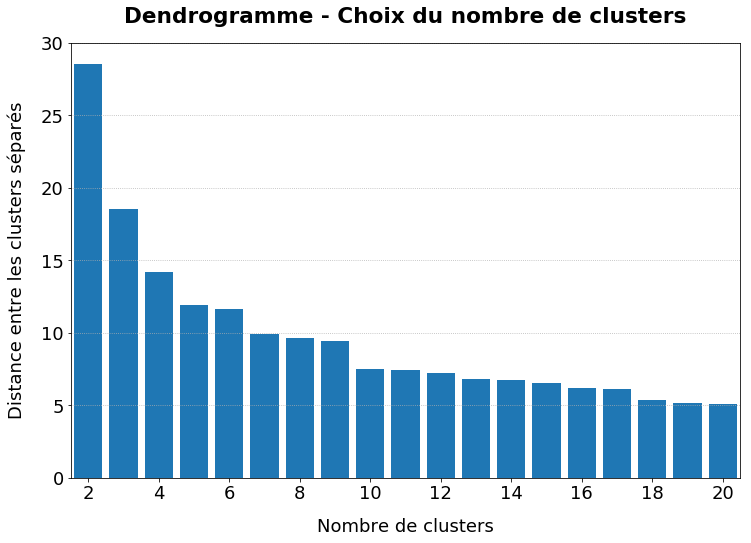

In [19]:
estimation_data = data.iloc[:,:-2]
dendro3 = sfca.ClassificationHierarchique(estimation_data)
fig, ax = dendro3.graphique_choix_nclusters(20)

J'ai le choix entre 9 clusters et 17 clusters. Il y a un gros décrochage dans la distance après 9 clusters. Le décrochage suivant, bien moins fort, se produit après 17 clusters. Pour être cohérent avec mon choix précédent d'une partition assez précise, j'opte pour un nombre de 17 clusters.

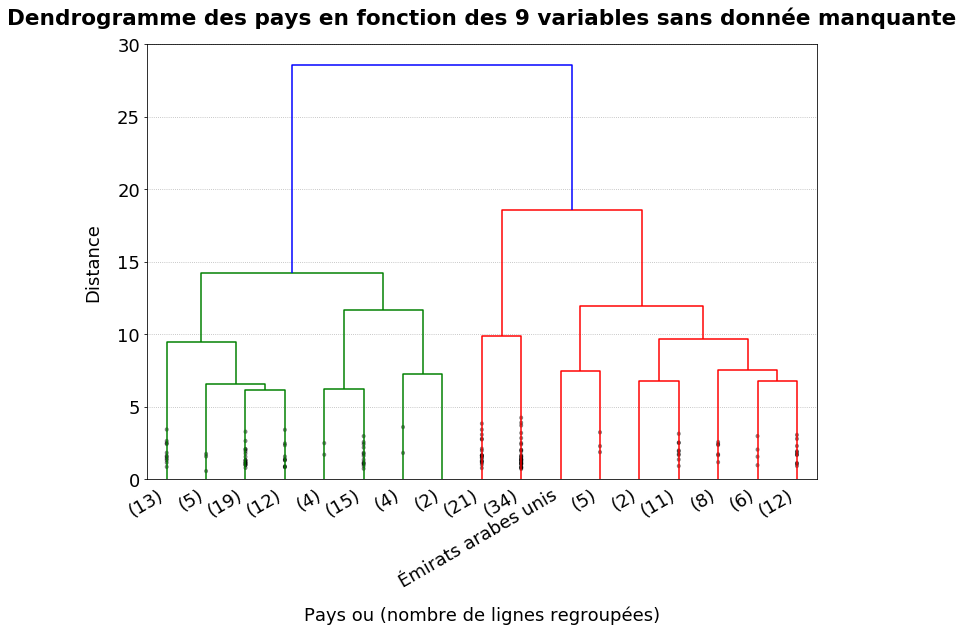

In [20]:
n_clusters = 17
dendro3.define_n_clusters(n_clusters)
fig, ax = dendro3.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 9 variables sans donnée manquante", clusters_label_title="Pays", n_clusters=n_clusters, label_rotation=30)

In [21]:
analysis = dendro3.df_data_clusters

Je réalise maintenant l'estimation de mes données manquantes à partir de ces clusters. Puis je reconstruis mon dataframe data et je vérifie que je n'ai plus de données manquantes.

In [22]:
for pays in liste_pays_political_stability:
    index_pays = data_primaire_2013[data_primaire_2013.country == pays].index
    cluster_estimation = analysis.loc[pays,"cluster"]
    liste_pays_estimation = analysis[analysis.cluster == cluster_estimation].index
    estimation = data_primaire_2013[data_primaire_2013.country.isin(liste_pays_estimation)].political_stability.mean()
    data_primaire_2013.loc[index_pays,"political_stability"] = estimation

In [23]:
for pays in liste_pays_doingbusiness :
    index_pays = data_primaire_2013[data_primaire_2013.country == pays].index
    cluster_estimation = analysis.loc[pays,"cluster"]
    liste_pays_estimation = analysis[analysis.cluster == cluster_estimation].index
    estimation = data_primaire_2013[data_primaire_2013.country.isin(liste_pays_estimation)].doing_business_score.mean()
    data_primaire_2013.loc[index_pays,"doing_business_score"] = estimation

In [24]:
data = data_primaire_2013.loc[:,"croissance_population":"food_supply_kcal_capita_day"].copy()
data["animals_proportion_poultry_protein"] = data_primaire_2013.animals_proportion_poultry_protein
data["poultry_food_proportion_import"] = data_primaire_2013.poultry_food_proportion_import
data["gdp_per_capita_usd"] = data_primaire_2013.gdp_per_capita_usd
data["income_variability"] = data_primaire_2013.income_variability
data["taux_urbanisation"] = data_primaire_2013.taux_urbanisation
data["political_stability"] = data_primaire_2013.political_stability
data["doing_business_score"] = data_primaire_2013.doing_business_score
data.index = data_primaire_2013.country
data.isna().sum()

croissance_population                 0
food_proportion_animal_protein        0
food_protein_g_capita_day             0
food_supply_kcal_capita_day           0
animals_proportion_poultry_protein    0
poultry_food_proportion_import        0
gdp_per_capita_usd                    0
income_variability                    0
taux_urbanisation                     0
political_stability                   0
doing_business_score                  0
dtype: int64

Je n'ai plus de données manquantes. Je peux commencer mon analyse.

---

<a id="2_0"></a>

## <font color=blue>2. Analyse de base : 11 variables - 8 clusters</font>

<a id="2_1"></a>

### <font color=blue>2.1. Classification hiérarchique</font>

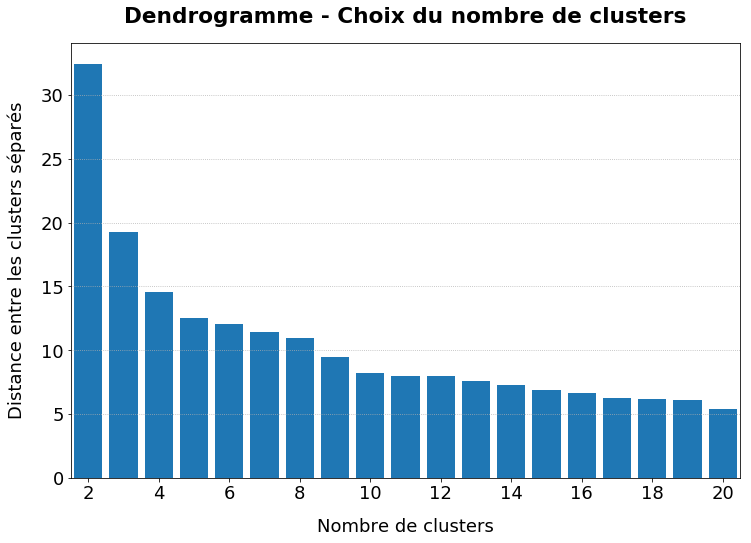

In [25]:
dendro4 = sfca.ClassificationHierarchique(data)
fig, ax = dendro4.graphique_choix_nclusters(20)
#plt.savefig("dendro2_choix_8clusters.png")
#plt.show()

Je choisis 8 clusters pour ma partition finale. Ce choix me permet de conserver une distance entre les clusters séparés supérieure à 10. De plus, la distance diminue sensiblement deux fois successives, après 8 clusters et après 9 clusters.

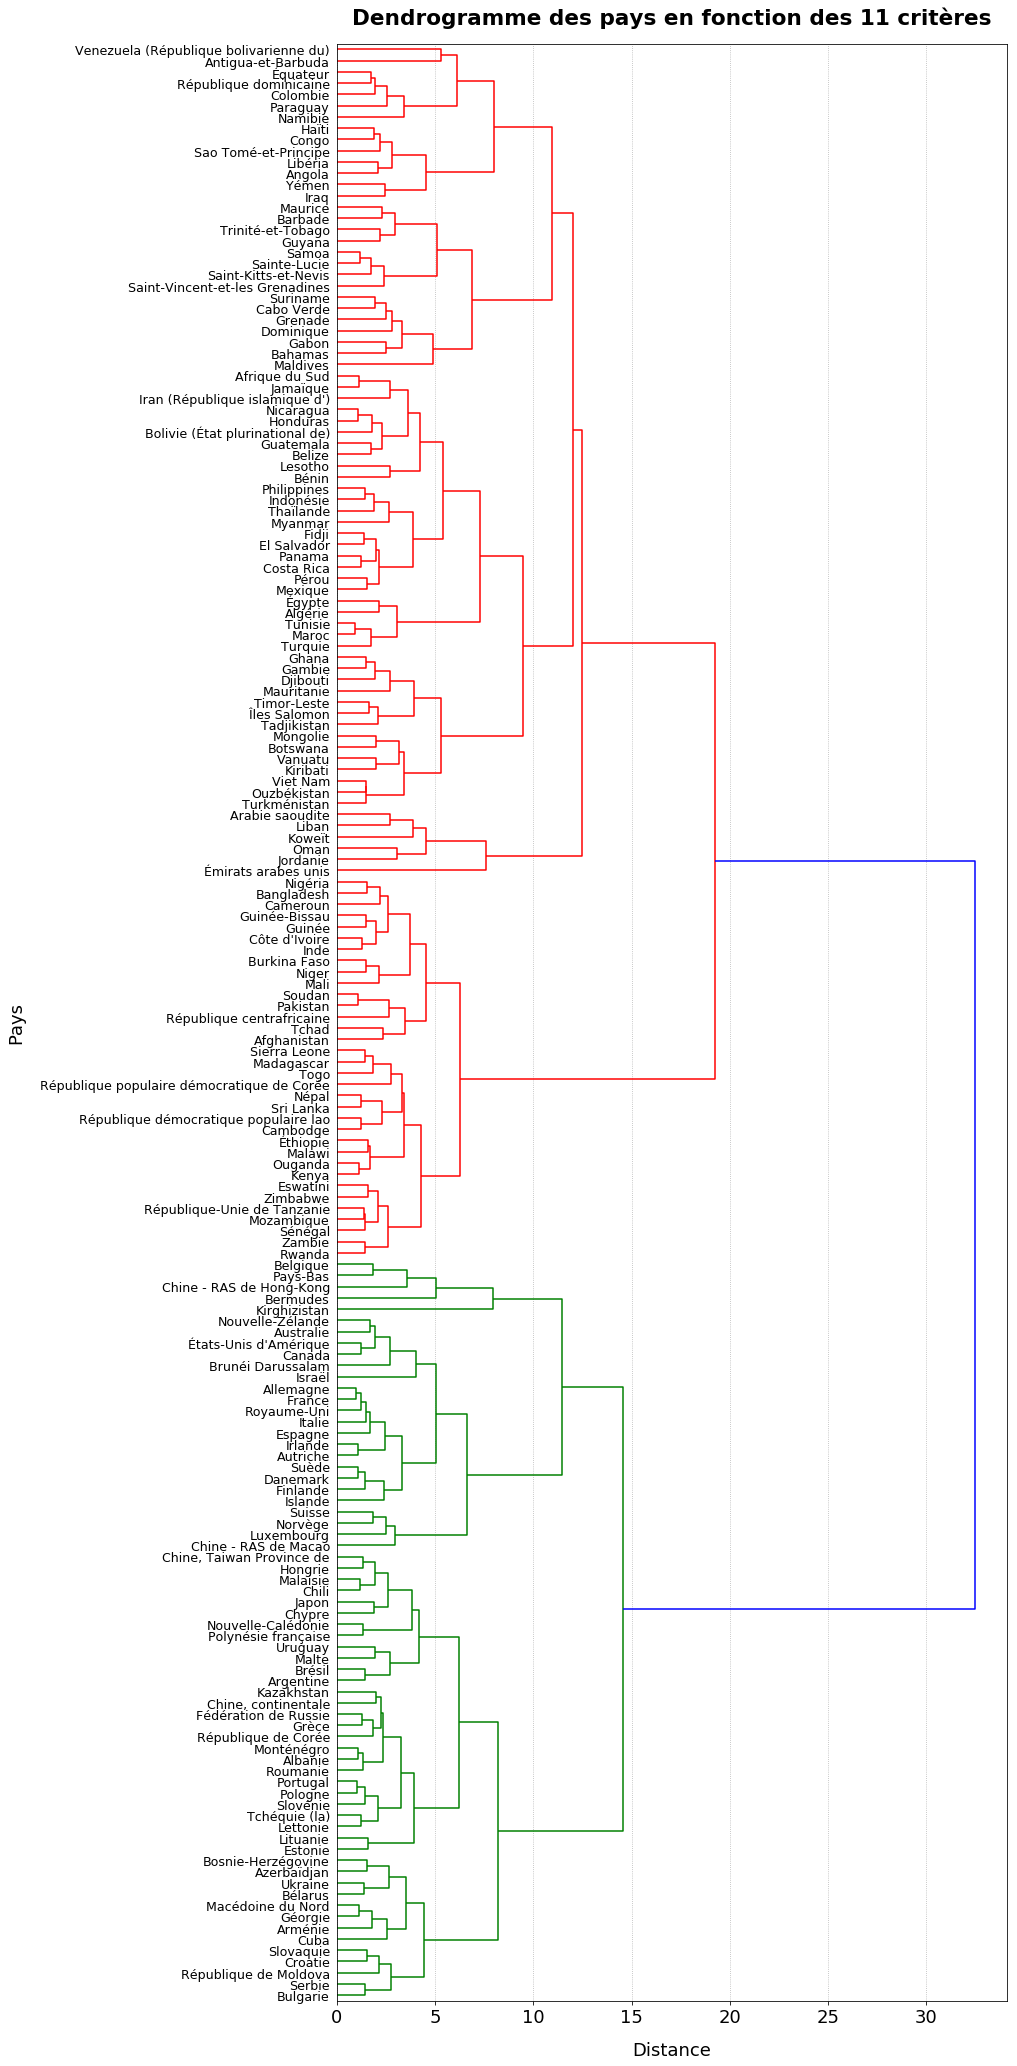

In [26]:
fig, ax = dendro4.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 11 critères", clusters_label_title="Pays", orientation='right', figsize=(12,36), mult_clusters_label_size=0.7)

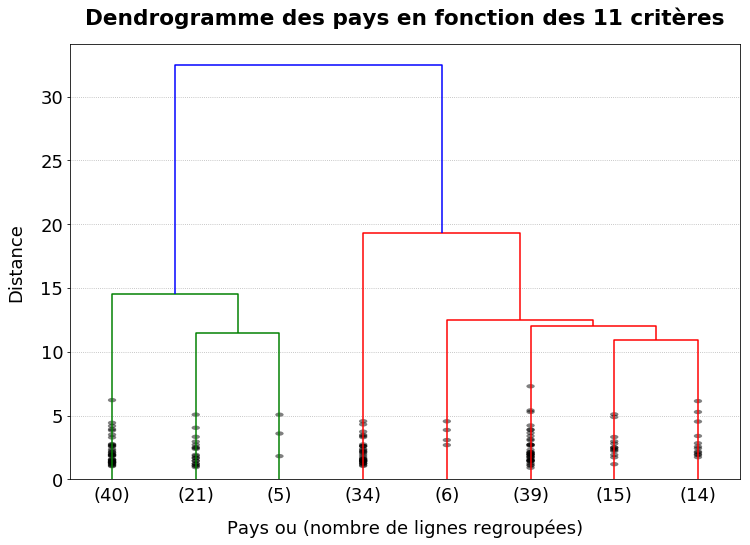

In [27]:
n_clusters = 8
dendro4.define_n_clusters(n_clusters)
fig, ax = dendro4.graphique_dendrogramme(title="Dendrogramme des pays en fonction des 11 critères", clusters_label_title="Pays", n_clusters=n_clusters)
#plt.savefig("dendro2_graphique.png")
#plt.show()

In [28]:
dendro4.df_centroids.iloc[:,:6]

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import
cluster 1,0.016019,0.518399,93.322250,3120.875000,0.166809,0.408781
cluster 2,0.111175,0.611891,107.638571,3396.619048,0.180521,0.313955
cluster 3,0.053063,0.613573,103.294000,3147.800000,0.127098,2.443742
cluster 4,0.270174,0.216396,60.543824,2366.764706,0.070444,0.101596
cluster 5,0.655617,0.426067,92.008333,3224.166667,0.338997,0.653399
cluster 6,0.179174,0.361356,75.677179,2781.256410,0.195174,0.343996
cluster 7,0.107920,0.545499,83.130667,2786.866667,0.333137,0.961102
cluster 8,0.234223,0.393942,59.930714,2408.285714,0.264825,0.523160


In [29]:
dendro4.df_centroids.iloc[:,6:]

,gdp_per_capita_usd,income_variability,taux_urbanisation,political_stability,doing_business_score,nombre_individus
cluster 1,14401.250066,1.158237,0.675435,0.277300,76.936213,40
cluster 2,57340.167410,0.733098,0.814833,0.876667,83.041587,21
cluster 3,45722.811323,0.929052,0.851416,0.612000,80.430000,5
cluster 4,1149.746264,1.002446,0.322892,-0.920294,55.209733,34
cluster 5,25126.139278,1.649921,0.811457,-0.201667,64.853333,6
cluster 6,4278.738498,0.830480,0.528452,-0.280769,62.699397,39
cluster 7,10486.584602,1.529537,0.441740,0.636000,61.522000,15
cluster 8,5283.200367,2.165018,0.574635,-0.630286,51.478571,14


<a id="2_2"></a>

### <font color=blue>2.2. Analyse des résultats</font>

Analyse des caractéristiques des clusters obtenus :  
- clusters 4, 6 et 8 : ces pays ne sont pas intéressants car ils présentent les PIB par habitant, taux d'urbanisation et disponibilité alimentaire les plus faibles de notre population.  
- cluster 7 : même si le PIB par habitant de ces pays est plus élevé que ceux des 3 clusters analysés précédemment, il reste faible. De plus, ces pays sont caractérisés par une forte dispersion de la distribution des revenus, un taux d'urbanisation faible et un score doing business peu élevé. Ces pays ne sont donc pas à cibler.
- cluster 5 : malgré un PIB par habitant, une croissance de la population et une disponibilité alimentaire intéressants, ces pays sont caractérisés par une forte dispersion des revenus, une faible stabilité politique et un score doing business peu élevé. Ce ne sont donc pas des pays prioritaires pour établir une activité d'exportation.  
- cluster 1 : ce sont les pays développés de deuxième rang. Ils cumulent les avantages de la stabilité politique, d'un score doing business intéressant, d'une urbanisation avancée, d'une faible dispersion des revenus, et d'une proportion de protéines d'origine animale déjà importante. Ils présentent de bonnes chances de bénéficier d'une croissance de leur marché, avec un PIB par habitant et une disponibilité alimentaire qui devraient croître. Ce sont de bons candidats pour développer une activité d'exportation déjà existante. 
- cluster 2 et 3 : ce sont les pays développés avec un PIB par habitant élevé, une stabilité politique élevée et de bonnes conditions pour les affaires, une forte urbanisation et une faible dispersion des revenus, ainsi qu'une forte disponibilité alimentaire et une forte proportion de protéines d'origine animale. Ces deux clusters se démarquent essentiellement par le niveau du PIB par habitant, la croissance de la population et le niveau des importations en viande de volaille. Ce sont les meilleurs candidats pour créer une première activité d'exportation, car ce sont les pays les plus similaires économiquement et culturellement à la France. De plus, on s'attend à y trouver des pays proches géographiquement.  
  
Je regarde la composition des clusters 1, 2 et 3.

In [30]:
analysis = dendro4.df_data_clusters.copy()
analysis[analysis.cluster == 1].index

Index(['Arménie', 'Albanie', 'Argentine', 'Brésil', 'Bulgarie', 'Chili',
       'Chine, continentale', 'Cuba', 'Chypre', 'Azerbaïdjan', 'Bélarus',
       'Estonie', 'Polynésie française', 'Géorgie', 'Bosnie-Herzégovine',
       'Grèce', 'Hongrie', 'Croatie', 'Kazakhstan', 'Japon',
       'République de Corée', 'Lettonie', 'Lituanie', 'Malaisie', 'Malte',
       'République de Moldova', 'Nouvelle-Calédonie', 'Macédoine du Nord',
       'Tchéquie (la)', 'Pologne', 'Portugal', 'Roumanie',
       'Fédération de Russie', 'Slovénie', 'Slovaquie',
       'Chine, Taiwan Province de', 'Ukraine', 'Uruguay', 'Serbie',
       'Monténégro'],
      dtype='object', name='country')

In [31]:
analysis[analysis.cluster == 2].index

Index(['Australie', 'Autriche', 'Brunéi Darussalam', 'Canada', 'Danemark',
       'Finlande', 'France', 'Allemagne', 'Islande', 'Irlande', 'Israël',
       'Italie', 'Chine - RAS de Macao', 'Nouvelle-Zélande', 'Norvège',
       'Espagne', 'Suède', 'Suisse', 'Royaume-Uni', 'États-Unis d'Amérique',
       'Luxembourg'],
      dtype='object', name='country')

In [32]:
analysis[analysis.cluster == 3].index

Index(['Bermudes', 'Chine - RAS de Hong-Kong', 'Kirghizistan', 'Pays-Bas',
       'Belgique'],
      dtype='object', name='country')

J'analyse plus précisément les pays des clusters 2 et 3, en les triant par distance géographique.

In [33]:
countries_analysis = analysis[analysis.cluster == 3].copy()
temp = pd.DataFrame({"country": data_secondaire_2013.country, "distance": data_secondaire_2013.distance_capitale_paris, "population": data_secondaire_2013.total_population})
countries_analysis = pd.merge(countries_analysis, temp, how='left', on="country")
countries_analysis.sort_values(by="distance")

,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import,gdp_per_capita_usd,income_variability,taux_urbanisation,political_stability,doing_business_score,cluster,distance,population
4,Belgique,0.070302,0.583534,99.60,3733.0,0.075017,1.866667,46713.438406,0.187517,0.973634,0.94,83.73,3,262.0,11151512.0
3,Pays-Bas,0.039427,0.678153,111.73,3228.0,0.130659,1.426434,52074.773952,0.371747,0.888443,1.14,85.22,3,430.0,16839699.0
2,Kirghizistan,0.133979,0.411461,85.16,2817.0,0.021689,3.923077,1290.514000,0.922968,0.346328,-0.91,63.95,3,5425.0,5683808.0
0,Bermudes,-0.032357,0.663877,90.80,2671.0,0.200730,2.000000,89968.618136,2.433545,1.040942,0.97,84.55,3,NaN,62771.0
1,Chine - RAS de Hong-Kong,0.053962,0.730841,129.18,3290.0,0.207393,3.002532,38566.712121,0.729483,1.007731,0.92,84.70,3,NaN,7148571.0


In [34]:
countries_analysis = analysis[analysis.cluster == 2].copy()
temp = pd.DataFrame({"country": data_secondaire_2013.country, "distance": data_secondaire_2013.distance_capitale_paris, "population": data_secondaire_2013.total_population})
countries_analysis = pd.merge(countries_analysis, temp, how='left', on="country")
countries_analysis.sort_values(by="distance").iloc[:13,:]

,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import,gdp_per_capita_usd,income_variability,taux_urbanisation,political_stability,doing_business_score,cluster,distance,population
6,France,0.055653,0.627431,110.53,3482.0,0.126316,0.286974,42532.438874,0.488225,0.795146,0.45,84.31,2,0.0,63919917.0
20,Luxembourg,0.217738,0.633298,113.88,3539.0,0.106073,0.909091,113341.237463,0.113026,0.872100,1.34,78.97,2,288.0,544721.0
18,Royaume-Uni,0.084942,0.564674,103.21,3424.0,0.219286,0.406000,42597.737474,0.321262,0.801806,0.49,86.09,2,342.0,64641110.0
17,Suisse,0.115304,0.642136,93.08,3391.0,0.111427,0.424242,84659.015399,1.120613,0.732890,1.40,79.18,2,435.0,8132674.0
9,Irlande,0.156171,0.589219,110.01,3599.0,0.167387,0.661157,51023.486060,0.361211,0.619332,0.90,83.10,2,780.0,4681967.0
7,Allemagne,-0.005158,0.605178,101.59,3498.0,0.118087,0.536419,46176.177749,0.571755,0.762366,0.93,85.24,2,879.0,81265139.0
4,Danemark,0.046566,0.641198,108.89,3367.0,0.152392,0.673333,60942.805627,0.891001,0.870336,0.96,88.54,2,1028.0,5637817.0
1,Autriche,0.049161,0.591846,106.21,3768.0,0.122017,0.664557,50137.519579,0.159236,0.652494,1.36,83.92,2,1036.0,8577782.0
15,Espagne,0.094814,0.621186,104.88,3175.0,0.179586,0.127327,29163.288417,0.220472,0.795175,0.01,84.30,2,1054.0,46697553.0
11,Italie,0.026157,0.536774,108.50,3578.0,0.132040,0.076652,35705.760553,0.223589,0.702081,0.50,77.58,2,1109.0,59668000.0


Cette analyse complémentaire me permet d'affiner mon analyse de base. Je conserve les 5 mêmes pays cibles que ceux définis précédemment : la Belgique, le Luxembourg, les Pays-Bas, la Suisse et l'Allemagne.  
**Je donne la priorité à la Belgique et aux Pays-Bas qui importent beaucoup de viande de volaille, ont une croissance de la population intéressante et constituent des marchés de taille moyenne (population entre 11 et 17 millions d'habitants).**  
**Ensuite viennent les trois autres pays qui peuvent être séparés en deux groupes.** D'une part, le Luxembourg et la Suisse présentent l'avantage d'un pouvoir d'achat très élevé mais sont de petits marchés. D'autre part, l'Allemagne constitue un gros marché mais sa population décroit.

Pour développer dans un second temps l'activité d'exportation, je peux ajouter des pays du cluster 2 si je préfère privilégier la sécurité ou sélectionner dans les pays du cluster 1 si je veux bénéficier de pays plus dynamiques en termes de croissance.

In [35]:
countries_analysis = analysis[analysis.cluster == 1].copy()
temp = pd.DataFrame({"country": data_secondaire_2013.country, "distance": data_secondaire_2013.distance_capitale_paris, "population": data_secondaire_2013.total_population})
countries_analysis = pd.merge(countries_analysis, temp, how='left', on="country")
countries_analysis.sort_values(by="distance").iloc[:10,:]

,country,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import,gdp_per_capita_usd,income_variability,taux_urbanisation,political_stability,doing_business_score,cluster,distance,population
28,Tchéquie (la),0.034690,0.577112,87.47,3256.0,0.128368,0.495098,19765.238618,0.337838,0.738025,1.08,80.28,1,883.0,10594481.0
33,Slovénie,0.038791,0.538621,96.19,3168.0,0.160394,0.346939,23288.231191,0.536616,0.499059,0.88,82.93,1,967.0,2066119.0
17,Croatie,-0.025323,0.568820,84.35,3059.0,0.062943,0.486486,13595.306568,1.830664,0.585218,0.64,76.42,1,1081.0,4277806.0
34,Slovaquie,0.004675,0.482002,72.51,2944.0,0.147067,0.731707,18152.256133,1.358696,0.541949,1.12,79.13,1,1091.0,5425130.0
16,Hongrie,-0.029606,0.533993,78.84,3036.0,0.219477,0.236287,13739.589942,1.185771,0.711154,0.80,77.54,1,1247.0,9841697.0
14,Bosnie-Herzégovine,-0.046107,0.331987,91.63,3154.0,0.147272,0.280000,5042.748881,1.902346,0.419428,-0.40,68.12,1,1348.0,3604999.0
29,Pologne,-0.003366,0.524983,101.47,3451.0,0.208185,0.046756,13684.131318,0.869313,0.604705,0.97,80.04,1,1369.0,38309451.0
38,Serbie,-0.039928,0.485707,82.21,2729.0,0.090408,0.118812,6351.678982,0.622939,0.590371,-0.08,77.34,1,1448.0,8920215.0
30,Portugal,0.003868,0.606837,110.87,3477.0,0.186088,0.200000,21474.211015,0.603969,0.628151,0.75,84.51,1,1456.0,10527674.0
39,Monténégro,0.002111,0.563130,112.07,3491.0,0.087308,0.700000,7119.391447,1.031223,0.630630,0.50,76.63,1,1495.0,627094.0


Ainsi, **pour un développement dans un second temps de l'activité d'exportation**, je ciblerais les pays suivants :
- **pays les plus sûrs : l'Irlande, l'Autriche, l'Espagne, l'Italie et les pays Scandinaves** (Danemark, Norvège, Suède, Finlande), ainsi que le Royaume-Uni lorsque la situation et les conséquences du Brexit seront éclaircies ;
- **pays les plus dynamiques : le Portugal et les pays d'Europe de l'Est** (Tchéquie, Slovénie, Croatie, Slovaquie, Hongrie, Pologne, Serbie).

<a id="2_3"></a>

### <font color=blue>2.3. Visualisation des résultats par une ACP</font>

Je prépare la visualisation de ma partition grâce à une ACP. Comme j'ai 11 variables et 174 pays, je fixe le nombre de composantes à 8. L'éboulis des valeurs propres me permettra d'évaluer le nombre de composantes significatives.

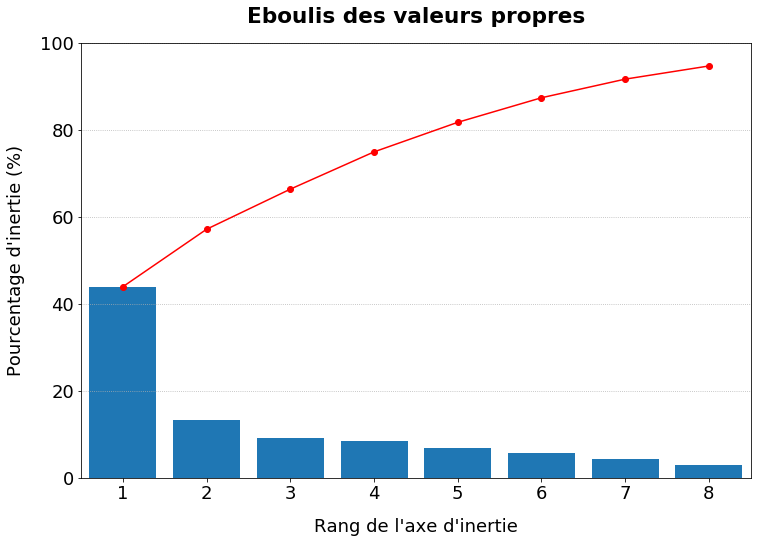

In [36]:
data_acp = dendro4.data
n_comp = 8
acp4 = sfca.ACP(data_acp, n_comp)
fig, ax = acp4.graphique_scree_plot()

Les deux premiers axes d'inertie représentent moins de 60% de l'inertie totale. Il peut être intéressant d'aller au-delà si les axes d'inertie 3 et 4 sont interprétables. J'examine les cercles des corrélations.

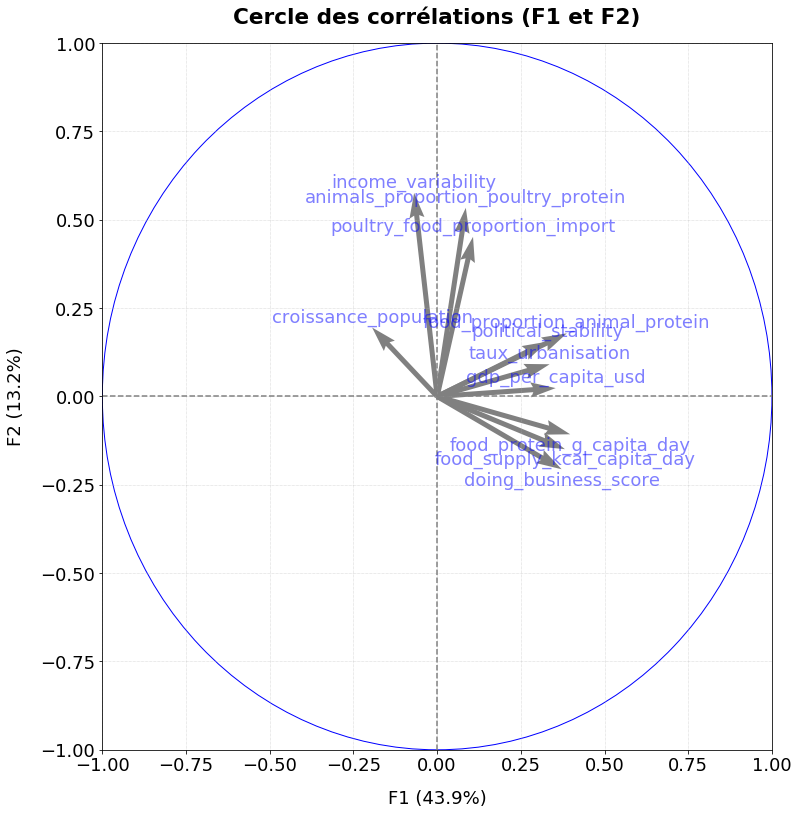

In [37]:
fig, ax = acp4.graphique_correlation_circles(axis_ranks=(0,1))
#plt.savefig("dendro2_cercle_correlations.png")
#plt.show()

Le premier axe d'inertie est surtout impacté par les variables : proportion de protéines d'origine animale, disponibilité alimentaire en quantité de protéines et en calories, score Doing Business, stabilité politique, taux d'urbanisation et PIB par habitant. Toutes ces variables illustrent le développement écononique du pays. Le premier axe d'inertie peut donc être interprété comme le développement économique du pays.  
Le second axe d'inertie est principalement influencé par la dispersion des revenus et la proportion de protéines issues de la viande de volaille parmi les protéines animales. Plus les revenus sont dispersés, plus le développement économique du pays est inégal dans la population. La viande de volaille est la viande la plus accessible en termes de prix, donc pour la population la moins riche. Une forte proportion de protéines issues de la viande de volaille signifie une plus forte consommation de volaille parmi les viandes mangées. Cela peut donc être le signe qu'une partie significative de la population ne bénéficie pas du même développement économique que le reste de la population. J'interprète ce second axe d'inertie comme la variabilité (ou dispersion) du développement économique au sein du pays.  
Remarque : on pourrait s'attendre à ce que le taux d'urbanisation soit également lié au deuxième axe d'inertie, ce qui n'est pas le cas.

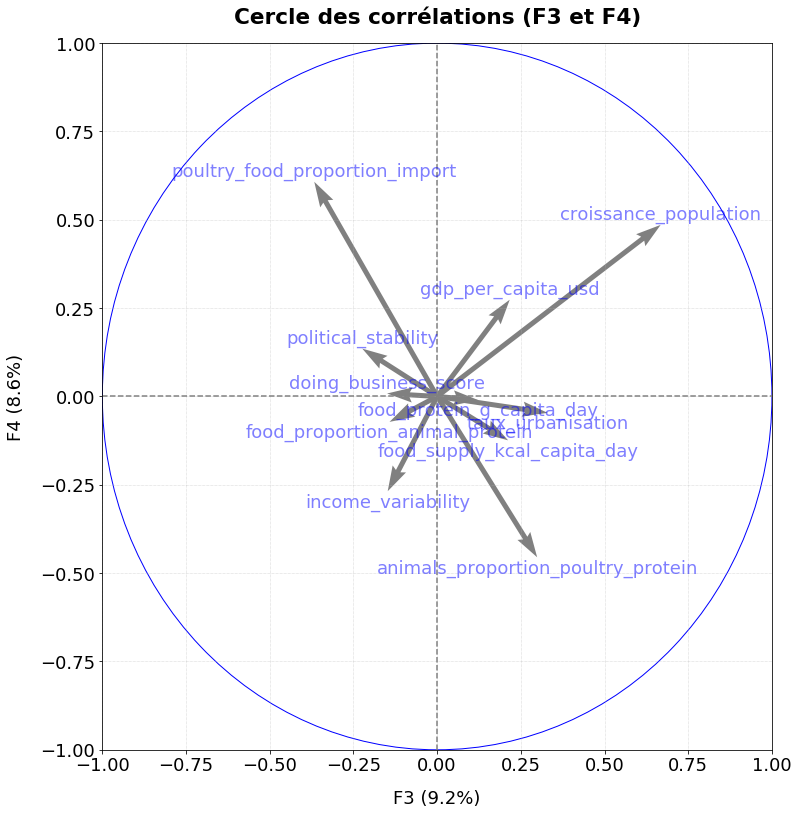

In [38]:
fig, ax = acp4.graphique_correlation_circles(axis_ranks=(2,3))

Le troisième axe d'inertie est principalement impacté par la croissance de la population. Il représente donc la croissance de la population.  
Le quatrième axe d'inertie est fortement lié la proportion importée parmi la viande de volaille consommée par les humains et, dans une moindre mesure et de façon négative à la proportion de protéines issues de la viande de volaille parmi les protéines animales. Si un pays produit peu de viande de volaille, cela peut avoir deux effets : soit il en importe beaucoup, soit il en consomme peu. Cet axe d'inertie est donc un indicateur inversé de l'importance de la production de viande de volaille dans le pays.

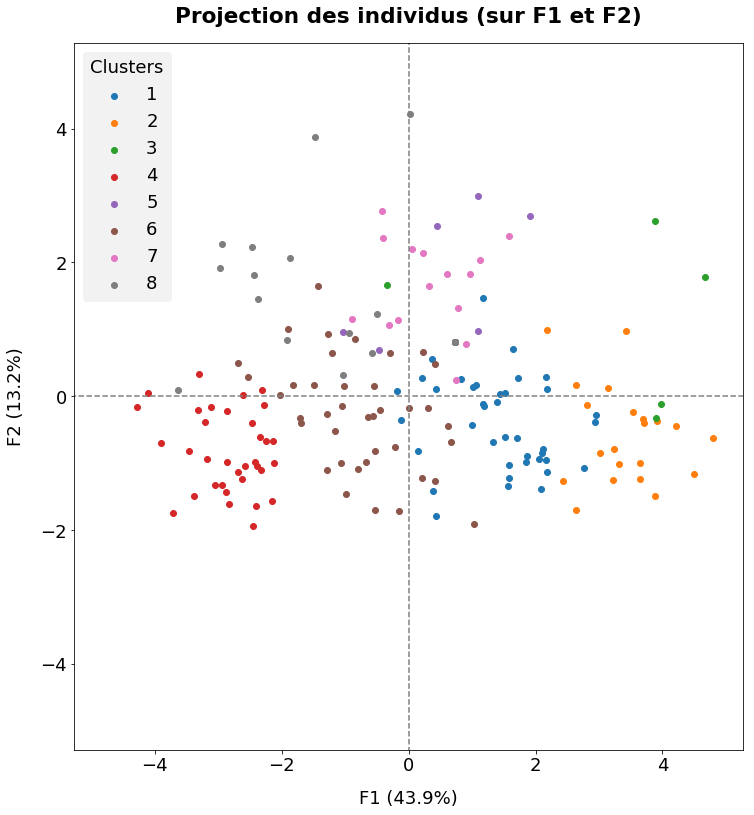

In [39]:
fig, ax = acp4.graphique_factorial_planes(axis_ranks=(0,1),illustrative_var=dendro4.df_clusters, illustrative_legend="Clusters")
#plt.savefig("dendro2_projection_individus.png")
#plt.show()

Le premier axe d'inertie reflète le développement économique du pays tandis que le second axe traduit la variabilité de ce développement économique au sein de la population du pays.  
Les pays des clusters 2 et 3 sont les plus développés économiquement, avec une dispersion du développement plus marquée pour les pays du cluster 3.  
Les pays du cluster 1 sont un peu moins développés et sont caractérisés par une grande homogénéité de développement.  
Les pays des clusters 5 et 7 sont en voie de développement avec une forte hétérogénéité de développement. Ils se distinguent peu sur le premier plan factoriel.  
En termes de développement économique, on trouve ensuite successivement les pays du cluster 6, puis du cluster 8 et enfin les pays sous-développés du cluster 4. Le cluster 8 est marqué par une forte variabilité de développement économique au contraire des 2 autres clusters.

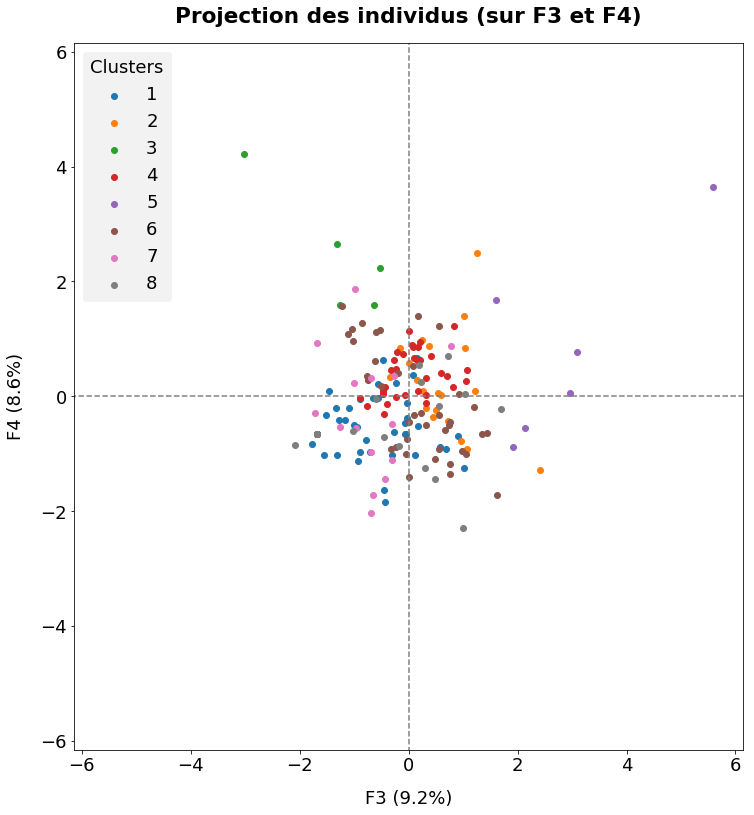

In [40]:
fig, ax = acp4.graphique_factorial_planes(axis_ranks=(2,3),illustrative_var=dendro4.df_clusters, illustrative_legend="Clusters")

Le troisième axe d'inertie indique la croissance de la population tandis que le quatrième axe est un indicateur inversé de l'importance de l'activité de production de viande de volaille dans le pays.  
Les pays du cluster 3 sont caractérisés par une faible production de viande de volaille.  
Les pays du cluster 5 présentent une croissance démographique élevée.  
Pour le reste, les points sont assez groupés vers le centre. Je décide de faire un zoom entre -3 et 3.

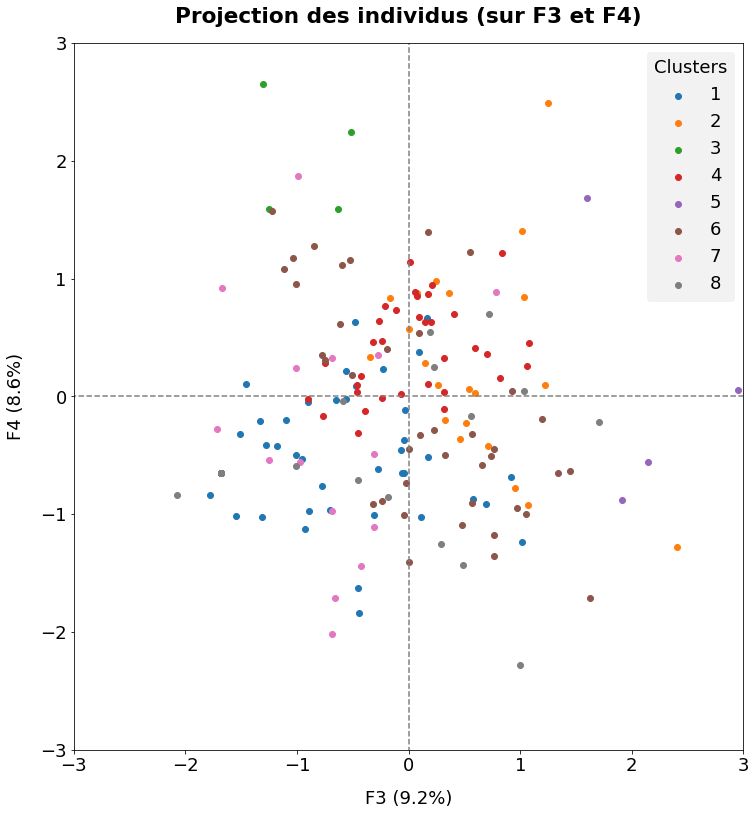

In [41]:
fig, ax = acp4.graphique_factorial_planes(axis_ranks=(2,3), illustrative_var=dendro4.df_clusters, illustrative_legend="Clusters", lims=[-3,3,-3,3])

Les pays du cluster 2 sont caractérisés par un plus grand dynamisme démographique que ceux du cluster 3.  
Les pays du cluster 7 sont en décroissance démographique. A la vue de la situation économique peu développée et de cette baisse démographique, je suppose que la plupart des pays de ce cluster 7 doivent être ou avoir été récemment en situation de conflit ou avoir subi des catastrophes naturelles d'ampleur.  
La dispersion des points des clusters 1, 4, 6 et 8 ne permet pas de caractériser ces clusters à la vue des troisième et quatrième axes d'inertie.

Je finis par regarder la position des centroïdes pour valider mon analyse.

In [42]:
acp4.calculate_centroids_projection(dendro4.df_clusters)

,F1 (43.9%),F2 (13.2%),F3 (9.2%),F4 (8.6%),F5 (6.8%),F6 (5.6%),F7 (4.3%),F8 (3.0%)
cluster 1,1.404928,-0.371073,-0.532501,-0.506679,-0.201269,0.190107,0.053597,-0.243365
cluster 2,3.408708,-0.568096,0.604452,0.266926,-0.222693,-0.572790,-0.104729,0.365282
cluster 3,3.219082,1.126925,-1.345725,2.460017,-0.001570,1.359441,-0.724705,-0.295925
cluster 4,-2.850640,-0.824786,0.044835,0.399937,-0.264283,-0.282456,0.046104,0.112753
cluster 5,0.508134,1.807927,2.879847,0.787749,-0.293656,0.300388,0.759109,-0.424901
cluster 6,-0.769686,-0.270315,0.141326,-0.118137,0.432580,0.145284,-0.028203,-0.146795
cluster 7,0.341517,1.661624,-0.724928,-0.301317,0.884163,0.059475,0.398197,0.472781
cluster 8,-1.793389,1.710813,0.135282,-0.488260,-0.475025,-0.080708,-0.522590,0.063743


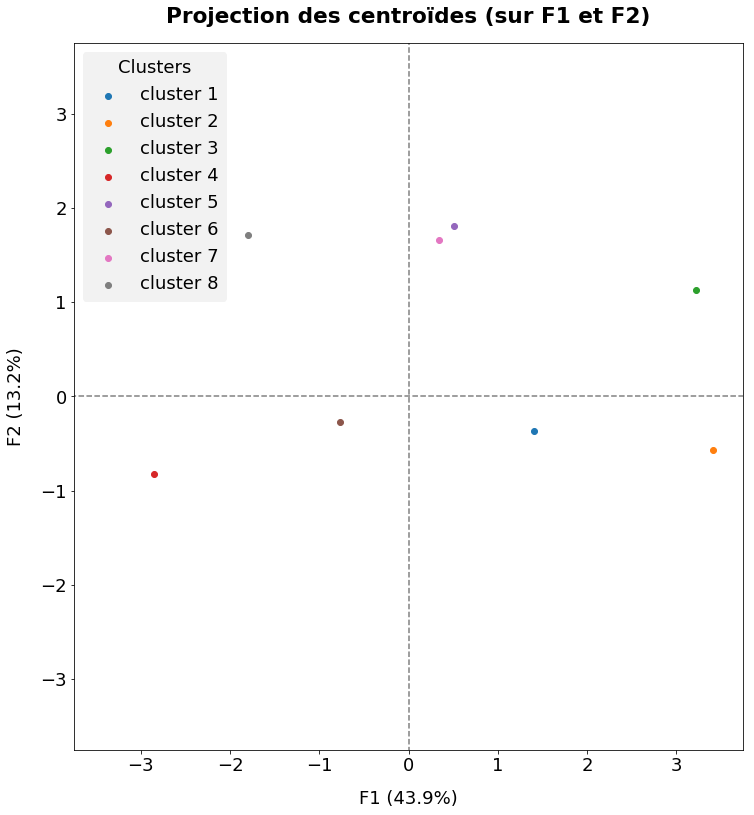

In [43]:
fig, ax = acp4.graphique_centroids_projection(illustrative_var=acp4.df_centroids_projected.index, illustrative_legend="Clusters")
#plt.savefig("dendro2_projection_centroids.png")
#plt.show()

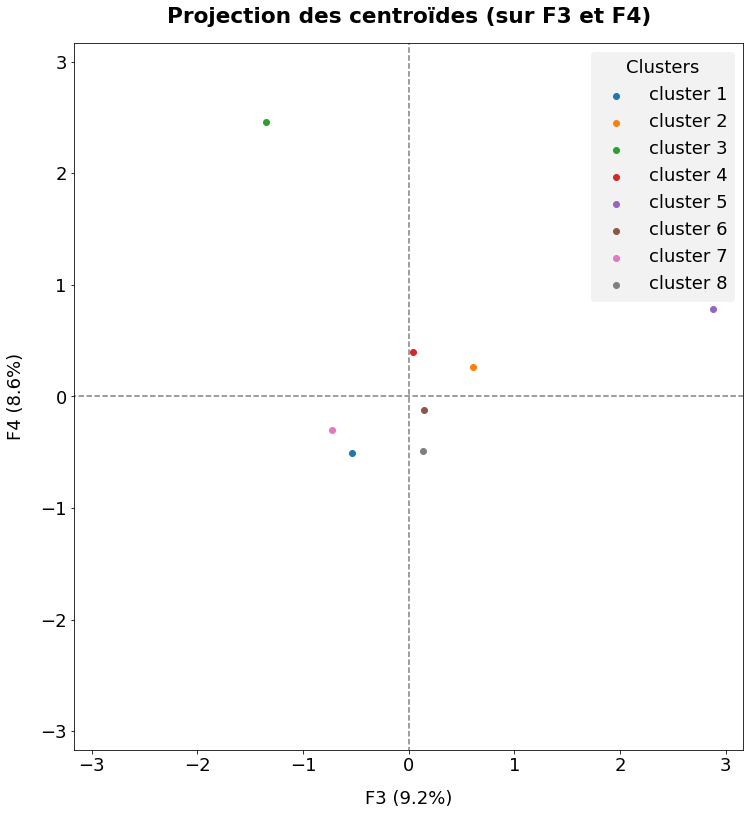

In [44]:
fig, ax = acp4.graphique_centroids_projection(axis_ranks=(2,3), illustrative_var=acp4.df_centroids_projected.index, illustrative_legend="Clusters")

La projection des centroïdes confirme l'analyse visuelle tirée de la projection des individus.

<a id="2_4"></a>

### <font color=blue>2.4. Sauvegarde des données</font>

Je sauvegarde les données avec les 8 clusters pour les tests complémentaires.

In [45]:
dendro4.df_data_clusters.to_csv("11variables_8clusters.csv", index=True)

---


<a id="3_0"></a>

## <font color=blue>3. Curiosité : Classification par k-means</font>

Par curiosité, je réalise une classification avec l'algorithme du k-means, avec les mêmes 11 variables.
Remarque : les numéros des clusters changent lorsque l'on relance l'analyse, même si leurs compositions et caractéristiques restent à peu près les mêmes d'une fois sur l'autre.

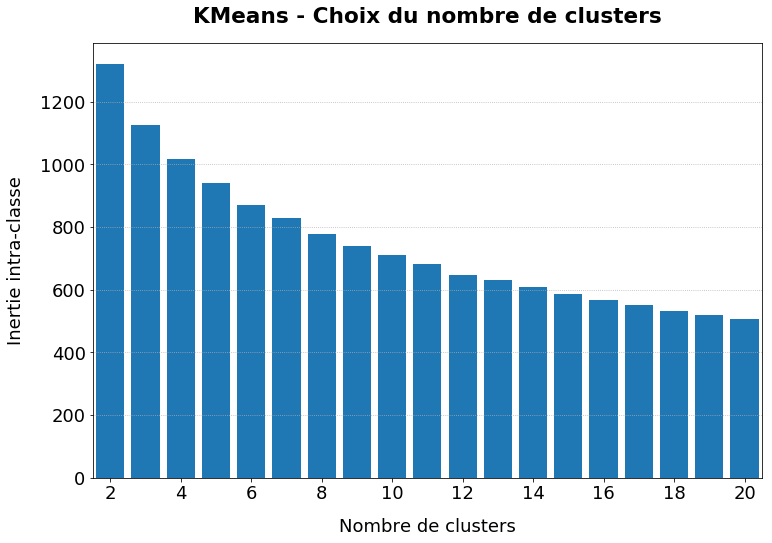

In [45]:
kmeans = sfca.ClassificationKmeans(data)
kmeans.calculate_kmeans(n_clust_min=2, n_clust_max=20, nb_essais_par_cluster=50)
fig, ax = kmeans.graphique_choix_nclusters()

Je choisis 8 clusters pour avoir le même nombre de clusters qu'avec la classification hiérarchique.

In [46]:
kmeans.define_n_clusters(8)
kmeans.df_centroids.iloc[:,:6]

,croissance_population,food_proportion_animal_protein,food_protein_g_capita_day,food_supply_kcal_capita_day,animals_proportion_poultry_protein,poultry_food_proportion_import
cluster 0,0.259960,0.241364,62.115778,2404.533333,0.079571,0.219339
cluster 1,-0.013328,0.498964,93.488667,3160.633333,0.154633,0.409934
cluster 2,0.148040,0.425042,89.180000,3093.217391,0.233219,0.072630
cluster 3,0.089276,0.612865,105.298800,3338.240000,0.166391,0.525282
cluster 4,0.151033,0.511179,79.011600,2743.200000,0.292335,0.901566
cluster 5,0.236496,0.376793,64.252381,2565.857143,0.277002,0.373692
cluster 6,0.167638,0.614806,112.256667,2946.333333,0.100791,2.864092
cluster 7,1.032882,0.446779,106.435000,3390.500000,0.336467,0.872259


In [47]:
kmeans.df_centroids.iloc[:,6:]

,gdp_per_capita_usd,income_variability,taux_urbanisation,political_stability,doing_business_score,nombre_individus
cluster 0,1361.158013,0.995833,0.347643,-0.874667,55.733131,45
cluster 1,11864.628203,1.357645,0.625651,0.274000,79.076417,30
cluster 2,9656.179170,0.643381,0.697405,-0.440435,67.176370,23
cluster 3,56784.054610,0.753462,0.839422,0.984800,82.994933,25
cluster 4,11295.828613,1.151798,0.476327,0.668880,63.637840,25
cluster 5,5506.883179,1.912529,0.601570,-0.544952,54.022857,21
cluster 6,16049.568667,1.124267,0.576999,0.046667,69.516667,3
cluster 7,45858.374107,2.243788,0.901095,0.530000,72.170000,2


Je m'attends à ce que les pays développés soient dans le cluster 3.  
Le cluster 7, qui ne regroupe que 2 pays, présente un PIB par habitant élevé mais également une dispersion des revenus très élevée ainsi qu'une très forte croissance de la population. Je m'attends à y retrouver les Emirats-Arabes-Unis et peut-être un autre pays de la péninsule arabique.  
Je m'attends à retrouver mes pays à fort potentiel dans le cluster 1, au regard du PIB par habitant, du taux d'urbanisation, du score doing business et des caractéristiques alimentaires.

In [52]:
analysis = kmeans.df_data_clusters.copy()
analysis[analysis.cluster == 1].index

Index(['Arménie', 'Albanie', 'Bulgarie', 'Cuba', 'Azerbaïdjan', 'Bélarus',
       'Estonie', 'Géorgie', 'Bosnie-Herzégovine', 'Grèce', 'Hongrie',
       'Croatie', 'Kazakhstan', 'République de Corée', 'Lettonie', 'Lituanie',
       'Maurice', 'République de Moldova', 'Macédoine du Nord',
       'Tchéquie (la)', 'Pologne', 'Portugal', 'Roumanie',
       'Fédération de Russie', 'Slovénie', 'Slovaquie',
       'Chine, Taiwan Province de', 'Ukraine', 'Serbie', 'Monténégro'],
      dtype='object', name='country')

In [53]:
analysis[analysis.cluster == 3].index

Index(['Australie', 'Autriche', 'Bermudes', 'Brunéi Darussalam', 'Canada',
       'Danemark', 'Finlande', 'France', 'Allemagne', 'Islande', 'Irlande',
       'Italie', 'Japon', 'Chine - RAS de Macao', 'Malte', 'Pays-Bas',
       'Nouvelle-Zélande', 'Norvège', 'Espagne', 'Suède', 'Suisse',
       'Royaume-Uni', 'États-Unis d'Amérique', 'Belgique', 'Luxembourg'],
      dtype='object', name='country')

In [54]:
analysis[analysis.cluster == 7].index

Index(['Koweït', 'Émirats arabes unis'], dtype='object', name='country')

La classification par k-means donne des clusters assez semblables à la classification hiérarchique.  
Nous retrouvons nos cinq pays cibles prioritaires pour initier une activité d'exportation dans le cluster 1, qui comprend également les pays les plus sûrs pour développer dans un deuxième temps cette même activité d'exportation. Les pays plus dynamiques qui peuvent servir de relais de croissance des exportations dans un deuxième temps (Portugal et pays d'Europe de l'Est) se retrouvent eux dans le cluster 2.

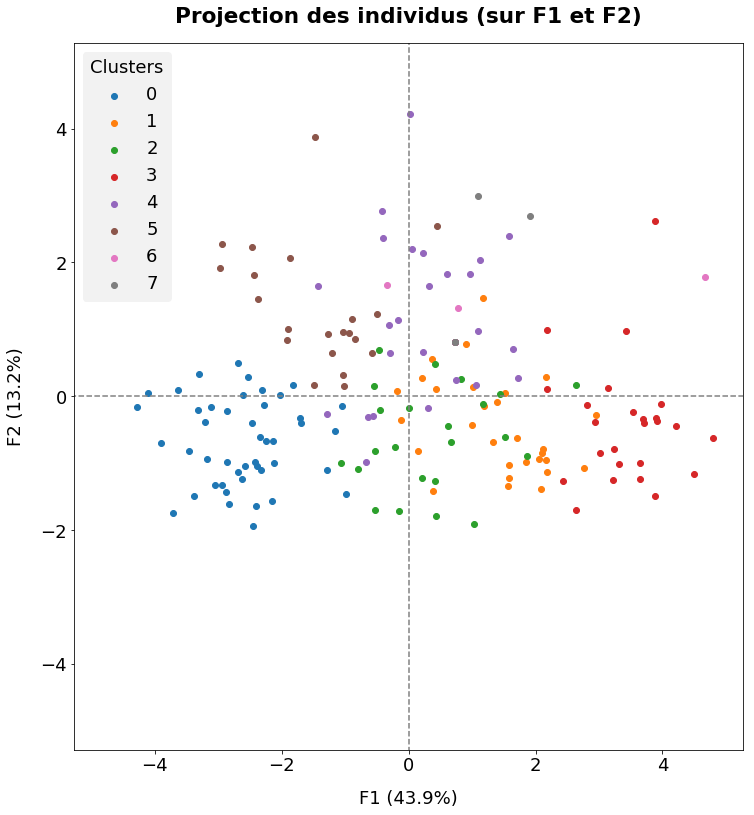

In [51]:
fig, ax = acp4.graphique_factorial_planes(axis_ranks=(0,1),illustrative_var=kmeans.df_clusters, illustrative_legend="Clusters")

Encore une fois, et en toute logique, les pays cibles sont les plus développés économiquement (cluster 3).  
Les pays qui peuvent servir de relais dynamique (cluster 1) sont les pays avec la plus grande homogénéité de développement parmi les pays qui suivent en terme de développement économique.